# COCO Dataset

In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

from ssd_data import augmentations
from text_data import datasets, target_transforms, transforms

In [2]:
augmentation = None

transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
    ]
)
target_transform = target_transforms.Compose(
    [target_transforms.Corners2Centroids(),
     target_transforms.ToQuadrilateral(),
     target_transforms.ToTensor()]
)
train_dataset = datasets.COCO2014Text_Dataset(ignore=target_transforms.Ignore(illegible=False), transform=transform, target_transform=target_transform, augmentation=None)


loading annotations into memory...
0:00:01.014678
creating index...
index created!


In [3]:
from ssd.core.boxes import centroids2corners
#from ssd.core.inference import toVisualizeRectangleRGBimg
from textboxespp.core.inference import toVisualizeQuadsRGBimg, toVisualizeRectangleRGBimg

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2, torch

['CAPTRAIN', '', 'CAPTRAIN']


<IPython.core.display.Javascript object>


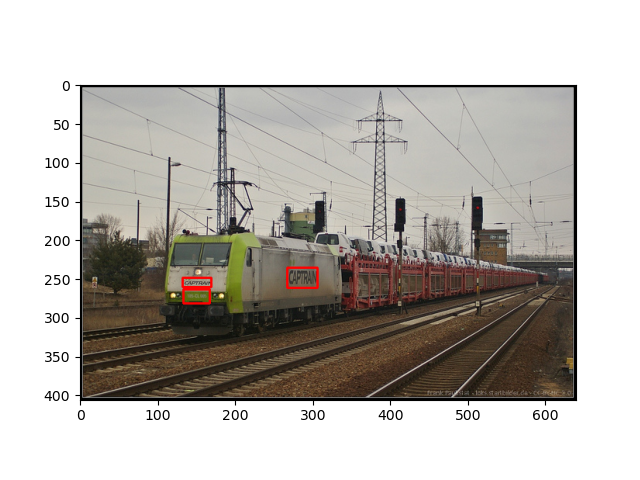

['8', '', '', '', '', '', '']


<IPython.core.display.Javascript object>


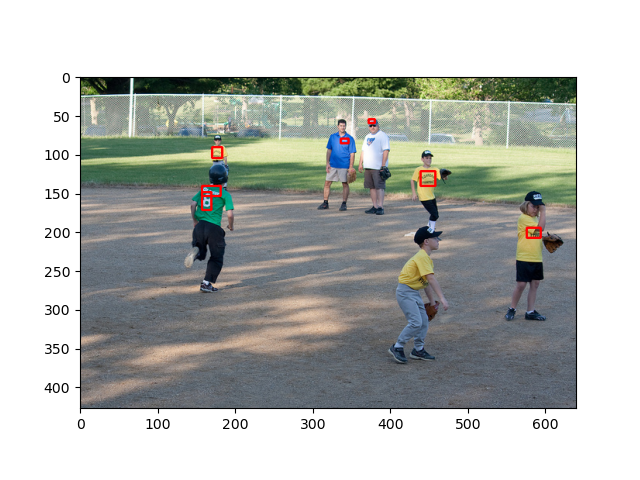

['giant', 'solar', 'blue', 'glass', 'nesn.com', "jordan's", "dunkin'", 'donuts', 'ne', 'city', 'granite', 'ab', 'on', 'bridget', '', '', 'lydon', 'ceremonial', 'pirch', 'rst']


<IPython.core.display.Javascript object>


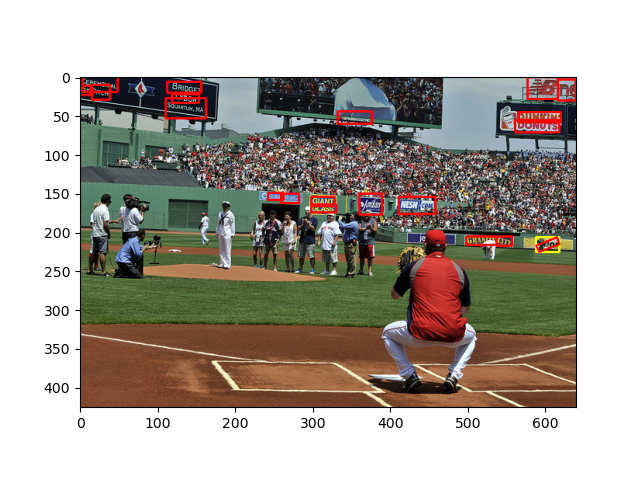

['george']


<IPython.core.display.Javascript object>


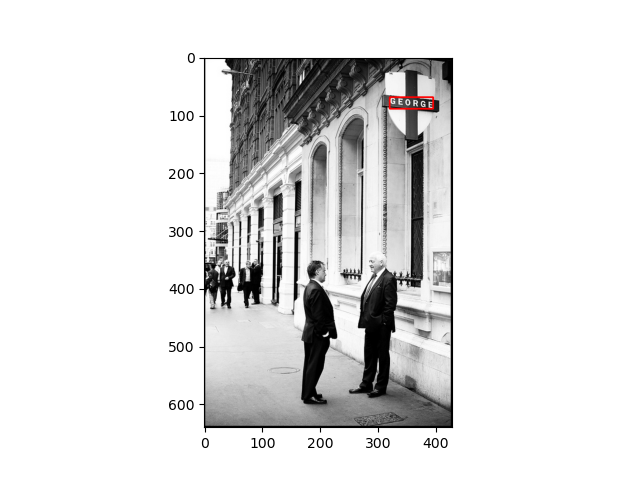

['L-17', '', 'NAVION']


<IPython.core.display.Javascript object>


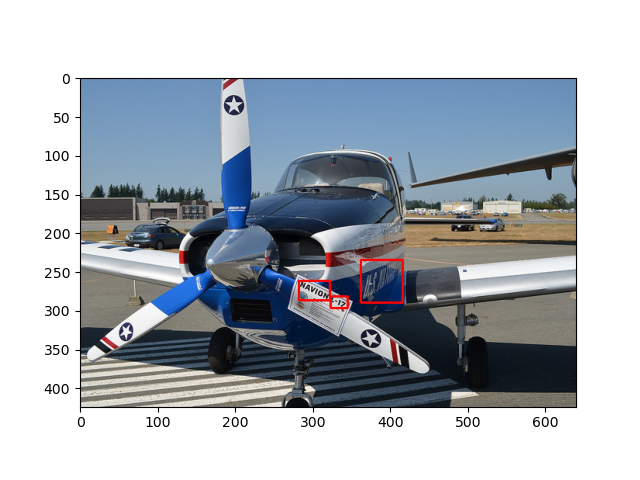

['', '', '', '', '52', '', '', '', 'J', '', '', '']


<IPython.core.display.Javascript object>


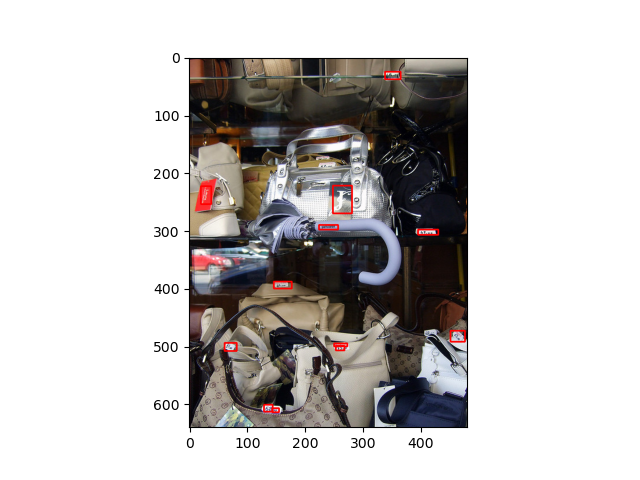

['ilford']


<IPython.core.display.Javascript object>


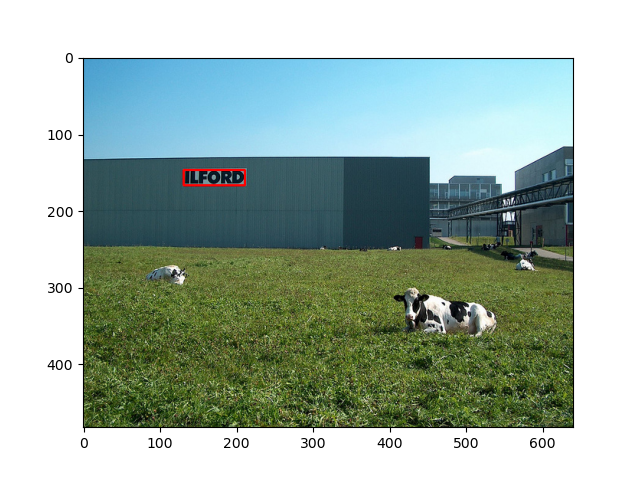

['aloe', 'HEAVY', '', '', '', 'CREAM', 'vera']


<IPython.core.display.Javascript object>


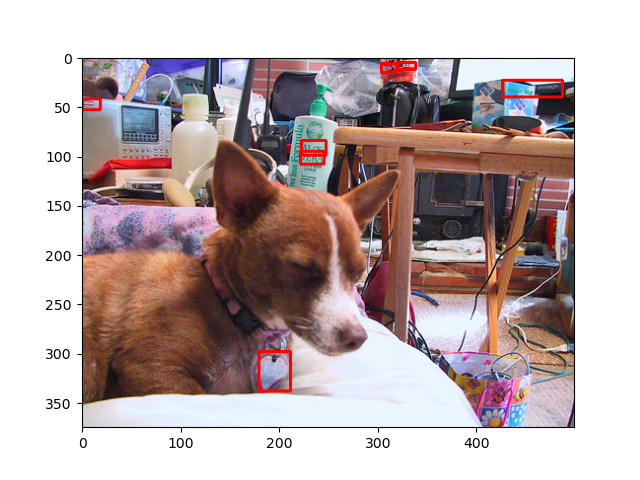

['', '19th', 'street', '', '', '', '', '']


<IPython.core.display.Javascript object>


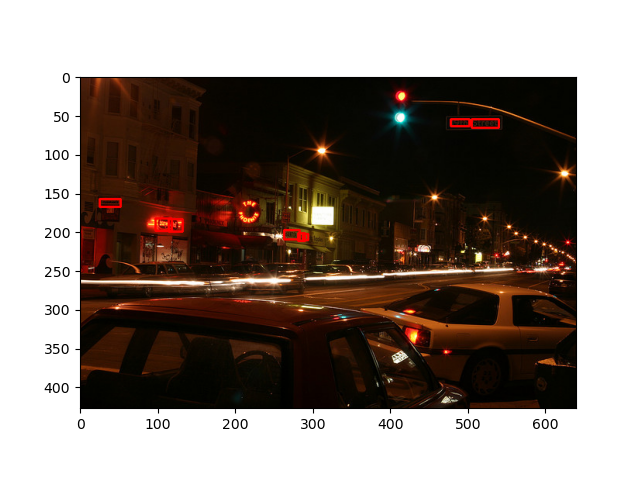

['', 'Lotia']


<IPython.core.display.Javascript object>


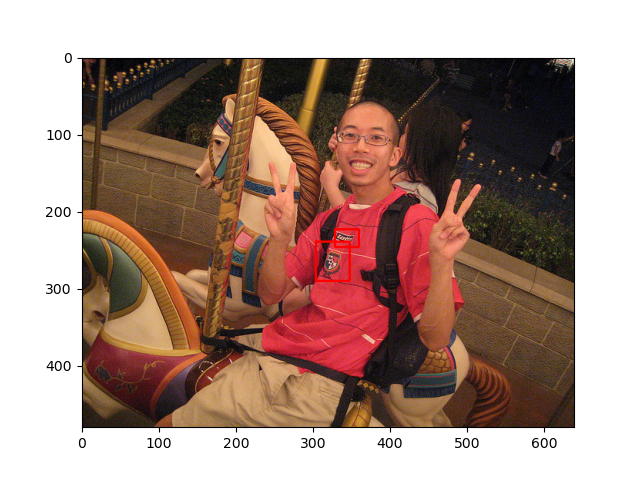

['', '', 'COCA']


<IPython.core.display.Javascript object>


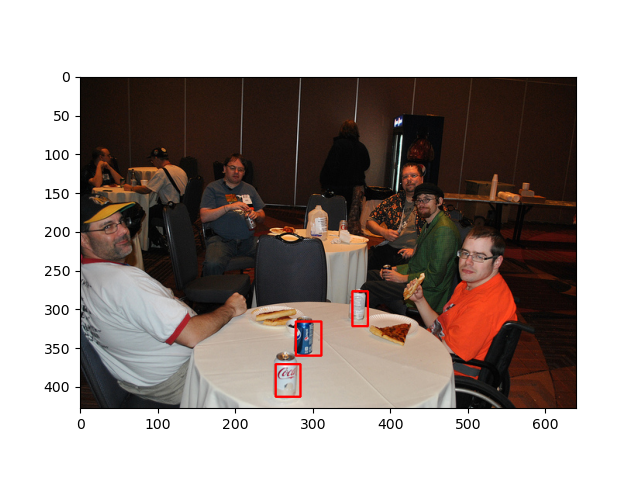

['', '', 'DEPOT', '', 'WALNUT']


<IPython.core.display.Javascript object>


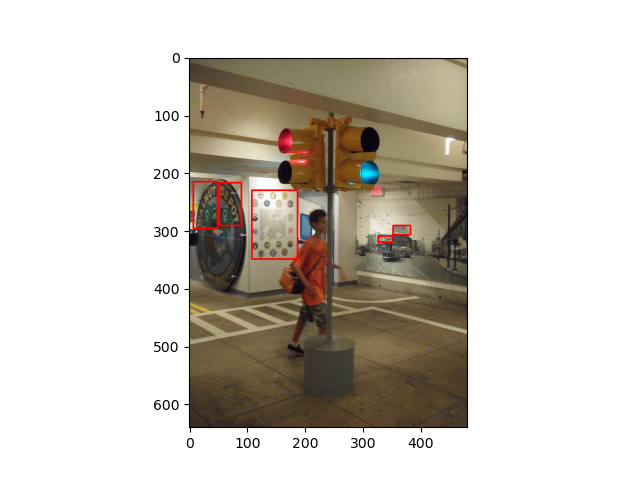

['P', 'POLICE', '1/2', '']


<IPython.core.display.Javascript object>


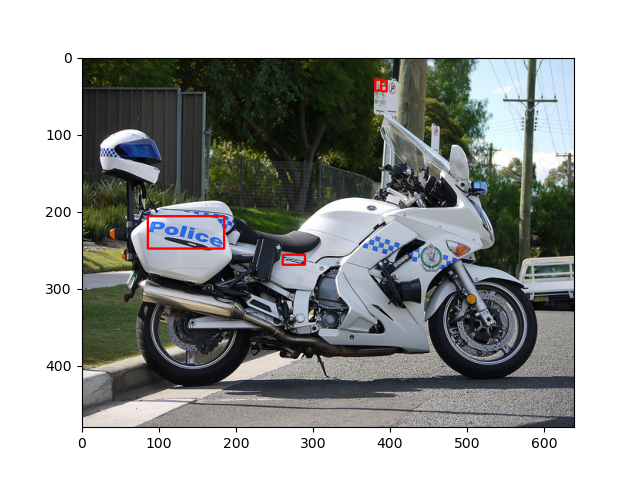

['MORALES', "TOMA'S"]


<IPython.core.display.Javascript object>


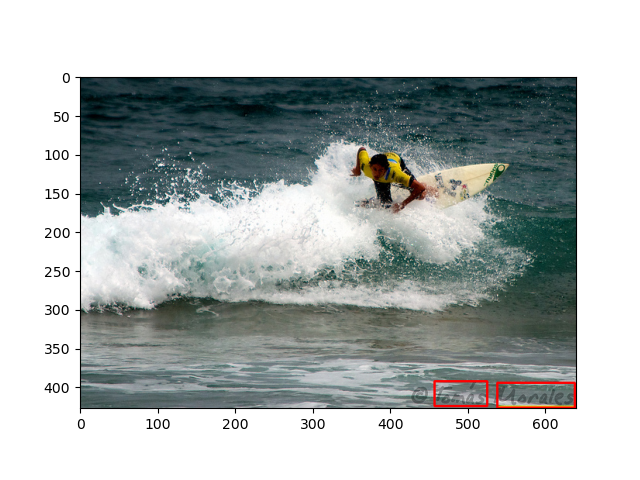

['KONG']


<IPython.core.display.Javascript object>


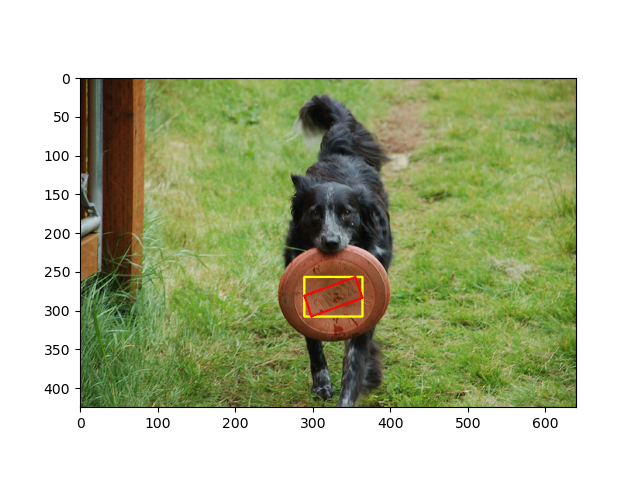

In [5]:
indices = np.random.randint(0, len(train_dataset), 15)

for index in indices:
    img, (targets, texts) = train_dataset[index]
    
    locs, quads = targets[:, :4], targets[:, 4:12]
    
    print(texts)
    
    img = toVisualizeRectangleRGBimg(img, locs, rgb=(255,255,0), verbose=False)# yellow
    img = toVisualizeQuadsRGBimg(torch.from_numpy(img.transpose((2, 0, 1)) / 255.), quads, verbose=False)# red

    plt.figure()
    plt.imshow(img)